In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Number of census tracts with >10 accidents in any year: 20


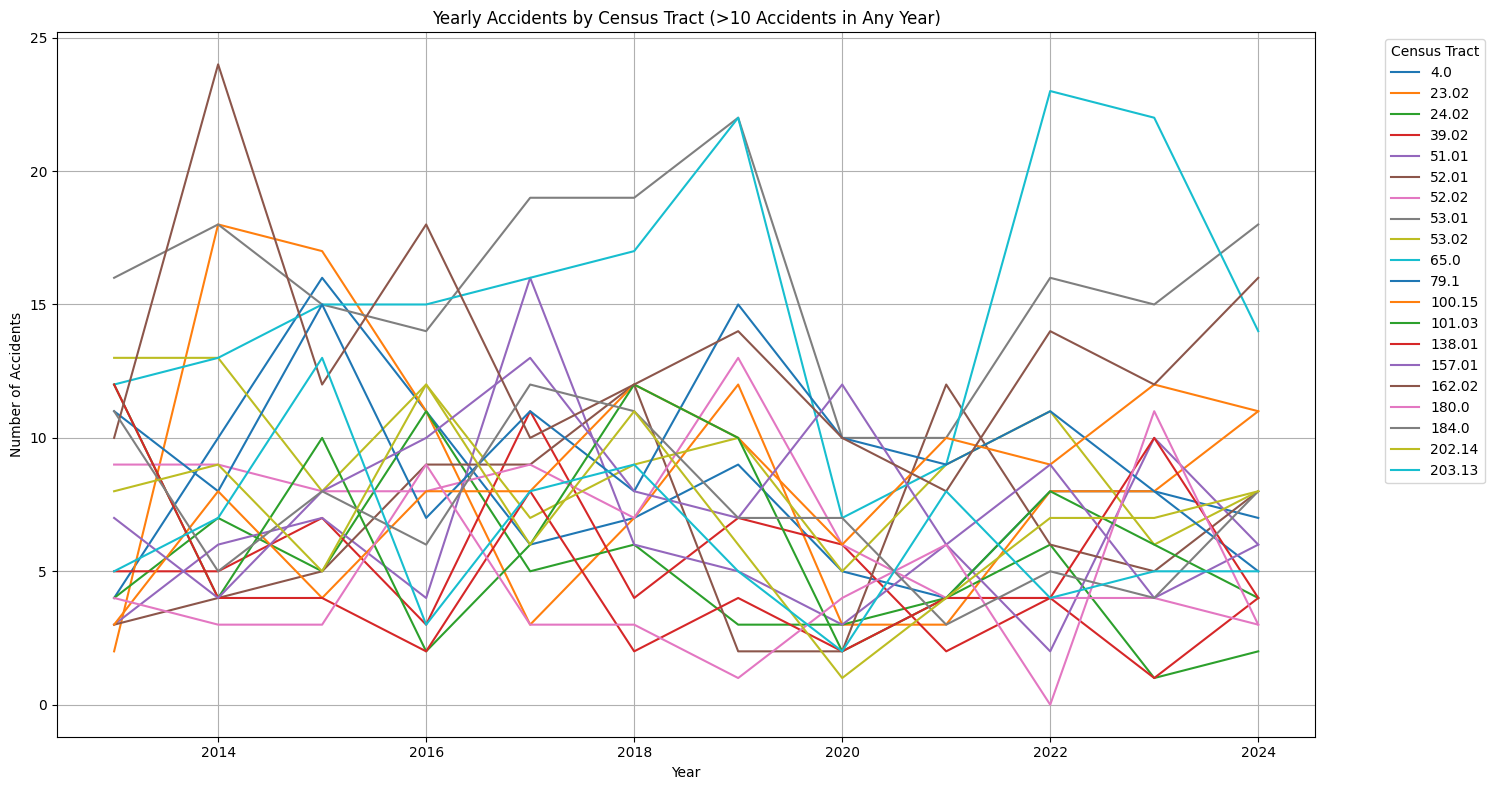

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/drive/MyDrive/traffic data/social status merge/collisions_with_driver_race_population_with_time.csv')

# Convert COLLISION_DATE to datetime and extract year
df['COLLISION_DATE'] = pd.to_datetime(df['COLLISION_DATE'], errors='coerce')
df['YEAR'] = df['COLLISION_DATE'].dt.year

# Group by year and census tract
yearly_counts = df.groupby(['YEAR', 'census_tract']).size().reset_index(name='accident_count')

# Pivot to get years as rows, census tracts as columns
pivot_df = yearly_counts.pivot(index='YEAR', columns='census_tract', values='accident_count').fillna(0)

# Filter: Keep census tracts with >10 accidents in at least one year
filtered_pivot = pivot_df.loc[:, (pivot_df > 10).any()]

# Print number of such tracts
print("Number of census tracts with >10 accidents in any year:", filtered_pivot.shape[1])

# Plot
plt.figure(figsize=(15, 8))
for tract in filtered_pivot.columns:
    plt.plot(filtered_pivot.index, filtered_pivot[tract], label=str(tract))

plt.title('Yearly Accidents by Census Tract (>10 Accidents in Any Year)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Census Tract', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()




<ipython-input-5-8d50536f3bf0>:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


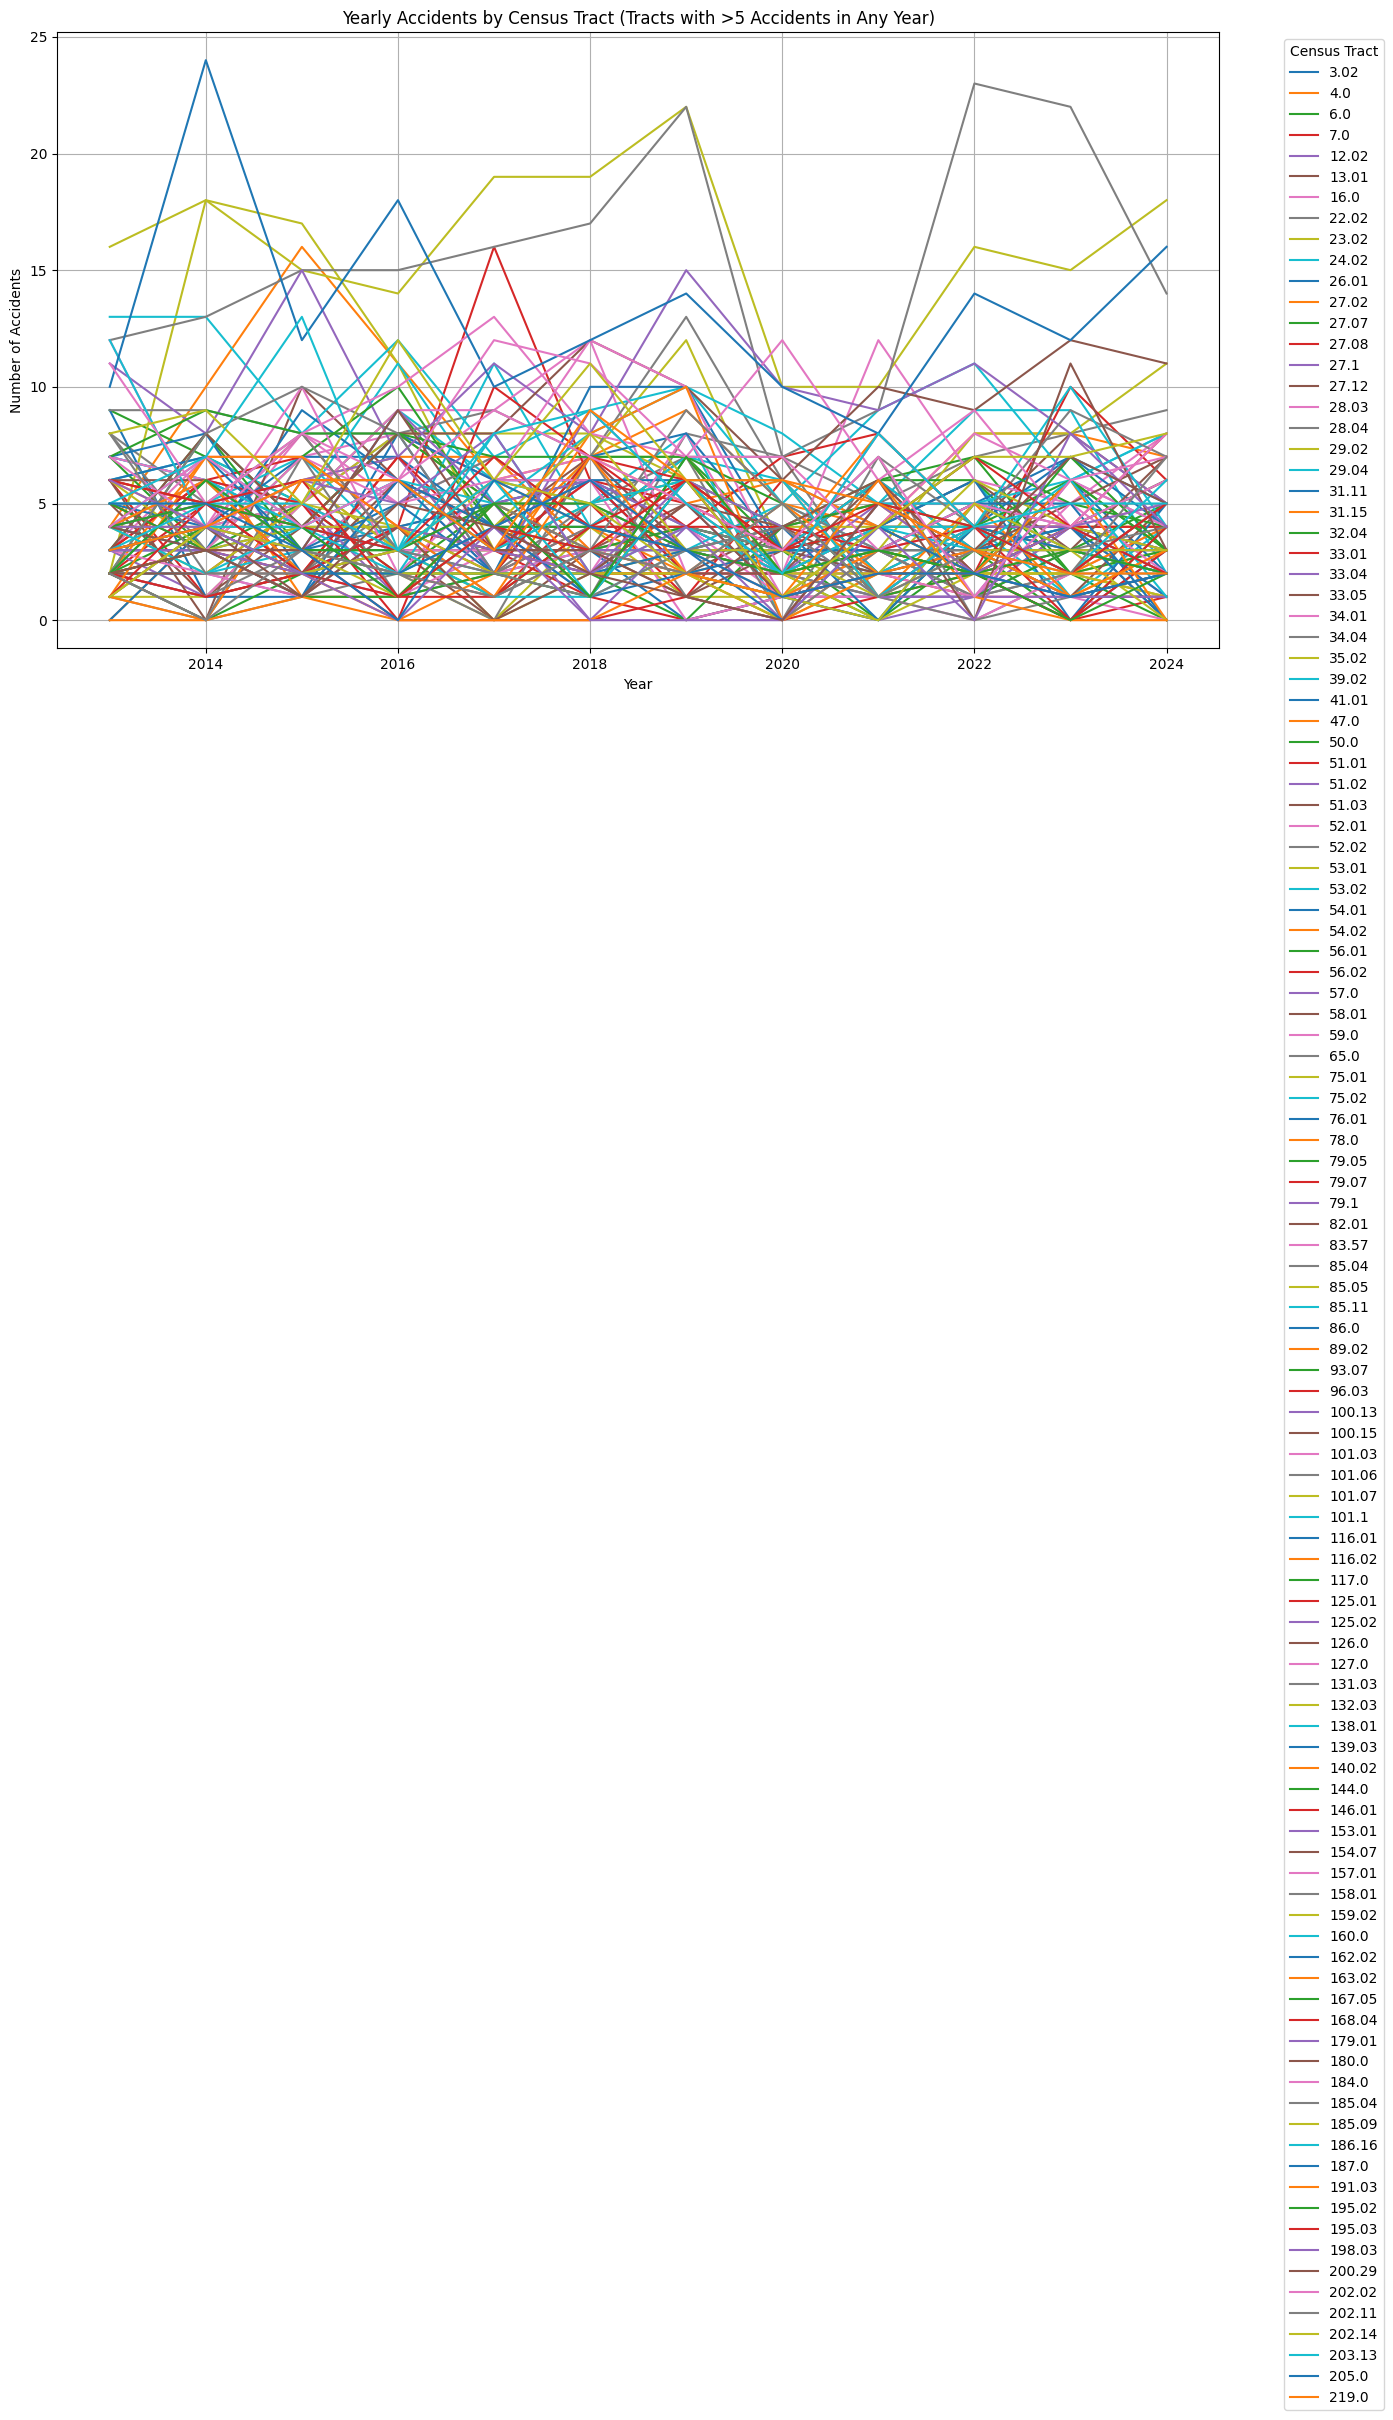

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/drive/MyDrive/traffic data/social status merge/collisions_with_driver_race_population_with_time.csv')

# Convert COLLISION_DATE to datetime and extract year
df['COLLISION_DATE'] = pd.to_datetime(df['COLLISION_DATE'], errors='coerce')
df['YEAR'] = df['COLLISION_DATE'].dt.year

# Group by year and census tract
yearly_counts = df.groupby(['YEAR', 'census_tract']).size().reset_index(name='accident_count')

# Pivot for easier filtering and plotting
pivot_df = yearly_counts.pivot(index='YEAR', columns='census_tract', values='accident_count').fillna(0)

# Keep only census tracts that had >5 accidents in at least one year
filtered_pivot = pivot_df.loc[:, (pivot_df > 5).any()]

# Plot
plt.figure(figsize=(15, 8))
for tract in filtered_pivot.columns:
    plt.plot(filtered_pivot.index, filtered_pivot[tract], label=str(tract))

plt.title('Yearly Accidents by Census Tract (Tracts with >5 Accidents in Any Year)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Census Tract', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
file_path = "/content/drive/My Drive/copy-TIMS_SD_Crashes2013-2024.csv"
collisions = pd.read_csv(file_path)
collisions.head()


,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,5639604,2013,2015-01-14,3711,2013-02-01,1816,6000,NaN,5,5,...,0,0,-,-,NaN,NaN,SAN DIEGO,SAN DIEGO,-117.093777,32.694394
1,5639619,2013,2013-03-11,9680,2013-01-19,410,019936,NaN,6,3,...,0,0,-,-,32.85306,-116.86512,SAN DIEGO,UNINCORPORATED,-116.864564,32.853113
2,5639726,2013,2015-01-14,3711,2013-02-06,1940,3792,3711,3,5,...,0,1,-,-,NaN,NaN,SAN DIEGO,SAN DIEGO,-117.079670,32.735391
3,5639817,2013,2015-01-15,3711,2013-02-18,1937,4243,NaN,1,5,...,0,0,-,-,NaN,NaN,SAN DIEGO,SAN DIEGO,-117.122654,32.917255
4,5639818,2013,2013-03-14,3711,2013-02-01,1143,3661,SANDI,5,5,...,0,0,-,-,NaN,NaN,SAN DIEGO,SAN DIEGO,-117.159290,32.990074


In [ ]:


# Define the file path (update if necessary)
file_path = '/content/drive/My Drive/SOC_-_Local_Roads__Speed_and_Volume_20250318.csv'

# Load the CSV file and assign it to 'traffic_volume'
traffic_volume = pd.read_csv(file_path)

# Display the first few rows
traffic_volume.head()


,osm_id,Street Name,Highway,Lanes,Speed Limit MPH,Length,Direction,PeakPeriod,Speed 2022 MPH,Speed 2021 MPH,1 year Speed % change,2022 AADT Range,2021 AADT Range,1 year AADT % change,geometry
0,153343706,"Orange Avenue, CA 75",primary,2,40,43.61,S,AM,18.0,18.8,-4.0,"10,000-19,999","10,000-19,999",13.5,LINESTRING (-117.178938176757 32.6836120192024...
1,153343706,"Orange Avenue, CA 75",primary,2,40,43.61,S,PM,16.9,17.3,-2.5,"10,000-19,999","10,000-19,999",13.5,LINESTRING (-117.178938176757 32.6836120192024...
2,161508068,Nimitz Boulevard,primary,-1,40,41.71,SE,AM,16.2,16.6,-2.1,"5,000-9,999","5,000-9,999",-2.6,LINESTRING (-117.221695942172 32.7260512722891...
3,161508068,Nimitz Boulevard,primary,-1,40,41.71,SE,PM,16.5,19.7,-16.4,"5,000-9,999","5,000-9,999",-2.6,LINESTRING (-117.221695942172 32.7260512722891...
4,186470511,Pacific Highway,primary,2,50,94.44,SE,AM,36.5,NaN,NaN,"5,000-9,999",NaN,NaN,LINESTRING (-117.195756931508 32.7457416671308...


In [ ]:
!pip install geopandas

import pandas as pd
import geopandas as gpd
from shapely.wkt import loads
from shapely.geometry import Point


In [ ]:
# Convert the 'geometry' column from WKT to shapely geometry
traffic_volume['geometry'] = traffic_volume['geometry'].apply(loads)

# Convert to GeoDataFrame
traffic_volume = gpd.GeoDataFrame(traffic_volume, geometry='geometry')


In [ ]:
# Convert POINT_X, POINT_Y into geometry (POINT objects)
collisions['geometry'] = collisions.apply(lambda row: Point(row['POINT_X'], row['POINT_Y']), axis=1)

# Convert DataFrame to GeoDataFrame
collisions = gpd.GeoDataFrame(collisions, geometry='geometry')

In [ ]:
# Perform spatial join to find the nearest road segment for each accident
merged_data = gpd.sjoin_nearest(collisions, traffic_volume, how='left', distance_col="distance_to_road")

# Display the merged dataset
merged_data.head()


,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,Length,Direction,PeakPeriod,Speed 2022 MPH,Speed 2021 MPH,1 year Speed % change,2022 AADT Range,2021 AADT Range,1 year AADT % change,distance_to_road
0,5639604,2013,2015-01-14,3711,2013-02-01,1816,6000,NaN,5,5,...,108.57,S,PM,22.3,21.3,4.7,"5,000-9,999","10,000-19,999",-22.3,0.000023
0,5639604,2013,2015-01-14,3711,2013-02-01,1816,6000,NaN,5,5,...,108.57,S,AM,21.3,21.9,-2.7,"5,000-9,999","10,000-19,999",-22.3,0.000023
1,5639619,2013,2013-03-11,9680,2013-01-19,410,019936,NaN,6,3,...,183.74,SW,AM,42.3,40.4,4.7,"10,000-19,999",NaN,NaN,0.004961
1,5639619,2013,2013-03-11,9680,2013-01-19,410,019936,NaN,6,3,...,183.74,SW,PM,43.4,44.0,-1.5,"10,000-19,999",NaN,NaN,0.004961
2,5639726,2013,2015-01-14,3711,2013-02-06,1940,3792,3711,3,5,...,24.40,SW,PM,13.1,NaN,NaN,"1,000-4,999","1,000-4,999",-1.3,0.009044


In [ ]:
# Filter out rows where POINT_X or POINT_Y have less than 6 decimal places
filtered_data = merged_data[
    (merged_data['POINT_X'].apply(count_decimal_places) >= 6) &
    (merged_data['POINT_Y'].apply(count_decimal_places) >= 6)
]

# Display the filtered data
filtered_data.head()


,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,Length,Direction,PeakPeriod,Speed 2022 MPH,Speed 2021 MPH,1 year Speed % change,2022 AADT Range,2021 AADT Range,1 year AADT % change,distance_to_road
0,5639604,2013,2015-01-14,3711,2013-02-01,1816,6000,NaN,5,5,...,108.57,S,PM,22.3,21.3,4.7,"5,000-9,999","10,000-19,999",-22.3,0.000023
0,5639604,2013,2015-01-14,3711,2013-02-01,1816,6000,NaN,5,5,...,108.57,S,AM,21.3,21.9,-2.7,"5,000-9,999","10,000-19,999",-22.3,0.000023
1,5639619,2013,2013-03-11,9680,2013-01-19,410,019936,NaN,6,3,...,183.74,SW,AM,42.3,40.4,4.7,"10,000-19,999",NaN,NaN,0.004961
1,5639619,2013,2013-03-11,9680,2013-01-19,410,019936,NaN,6,3,...,183.74,SW,PM,43.4,44.0,-1.5,"10,000-19,999",NaN,NaN,0.004961
2,5639726,2013,2015-01-14,3711,2013-02-06,1940,3792,3711,3,5,...,24.40,SW,PM,13.1,NaN,NaN,"1,000-4,999","1,000-4,999",-1.3,0.009044


In [ ]:
merged_data.to_csv("/content/drive/My Drive/your-folder/merged_traffic_collisions.csv", index=False)


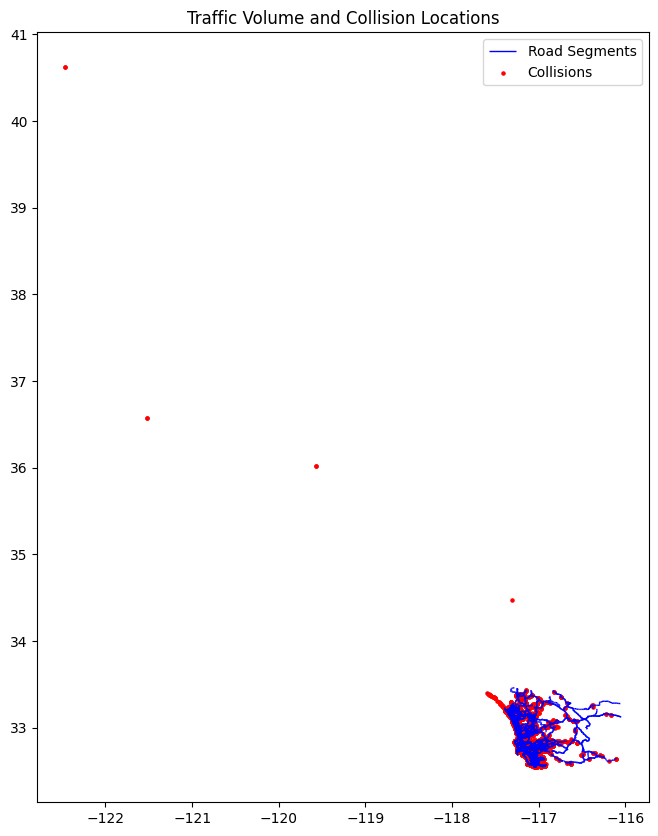

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plot traffic volume road segments (lines)
fig, ax = plt.subplots(figsize=(10, 10))
traffic_volume.plot(ax=ax, color='blue', linewidth=1, label='Road Segments')

# Plot collision locations (points)
merged_data = gpd.GeoDataFrame(merged_data, geometry=gpd.points_from_xy(merged_data['POINT_X'], merged_data['POINT_Y']))
merged_data.plot(ax=ax, color='red', markersize=5, label='Collisions')

# Add title and legend
plt.title("Traffic Volume and Collision Locations")
plt.legend()

# Show the plot
plt.show()



In [ ]:
# Define the latitude and longitude bounds for the region (San Diego example)
lat_min, lat_max = 32.5, 33.5
lon_min, lon_max = -118.5, -116.5

# Filter out rows with points outside the bounds
outliers = merged_data[
    (merged_data['POINT_Y'] < lat_min) |
    (merged_data['POINT_Y'] > lat_max) |
    (merged_data['POINT_X'] < lon_min) |
    (merged_data['POINT_X'] > lon_max)
]

# Display the outliers
print(f"Number of outliers: {len(outliers)}")
outliers.head()




Number of outliers: 30


,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,Length,Direction,PeakPeriod,Speed 2022 MPH,Speed 2021 MPH,1 year Speed % change,2022 AADT Range,2021 AADT Range,1 year AADT % change,distance_to_road
9,5815138,2013,2014-10-20,9680,2013-02-20,709,16102,NaN,3,1,...,170.75,NW,PM,42.1,41.3,1.8,"1,000-4,999","1,000-4,999",-22.2,0.005689
9,5815138,2013,2014-10-20,9680,2013-02-20,709,16102,NaN,3,1,...,170.75,NW,AM,40.6,38.4,5.5,"1,000-4,999","1,000-4,999",-22.2,0.005689
850,6281368,2013,2014-05-03,9680,2013-11-12,1740,018279,NaN,2,2,...,455.08,N,NaN,NaN,NaN,NaN,0-999,0-999,-36.4,0.000034
874,6290243,2014,2014-04-04,9680,2014-02-16,1835,15766,NaN,7,2,...,29.31,W,NaN,NaN,NaN,NaN,0-999,0-999,-10.4,0.000034
2410,6854230,2015,2017-04-21,9680,2015-02-07,1942,18672,NaN,6,2,...,289.92,E,NaN,NaN,NaN,NaN,"1,000-4,999","1,000-4,999",-19.1,0.000045


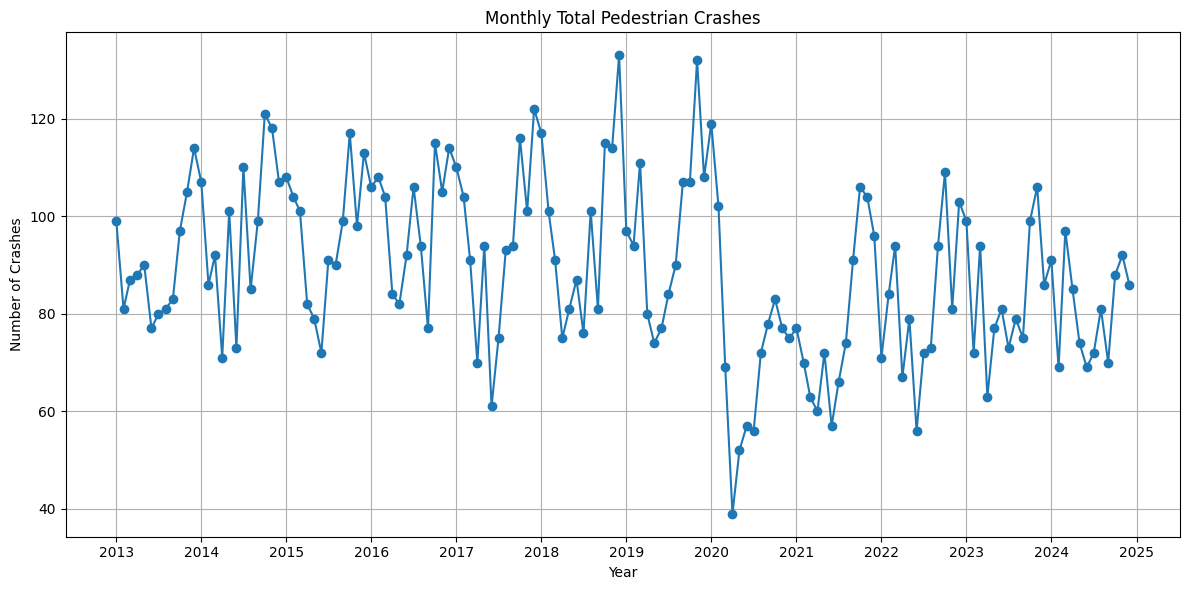

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
csv_path = "/content/drive/MyDrive/traffic data/social status merge/Ped_Crashes.csv"
df = pd.read_csv(csv_path)

# Convert 'COLLISION_DATE' to datetime
df['COLLISION_DATE'] = pd.to_datetime(df['COLLISION_DATE'], errors='coerce')
df = df.dropna(subset=['COLLISION_DATE'])

# Create 'year-month' column for grouping
df['year_month'] = df['COLLISION_DATE'].dt.to_period('M').dt.to_timestamp()

# Count crashes per month
monthly_counts = df.groupby('year_month').size().reset_index(name='total_crashes')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['year_month'], monthly_counts['total_crashes'], marker='o')

# Format x-axis to show only year ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title("Monthly Total Pedestrian Crashes")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd

# Extract year from COLLISION_DATE
df['year'] = df['COLLISION_DATE'].dt.year

# Count crashes per year
yearly_counts = df.groupby('year').size().reset_index(name='total_crashes')

# Calculate year-over-year percent change
yearly_counts['percent_change'] = yearly_counts['total_crashes'].pct_change() * 100

# Get year with max and min crashes
max_year = yearly_counts.loc[yearly_counts['total_crashes'].idxmax()]
min_year = yearly_counts.loc[yearly_counts['total_crashes'].idxmin()]

# Calculate average crashes per year
average_yearly = yearly_counts['total_crashes'].mean()

# Print results
print("📅 Yearly Crash Counts:")
print(yearly_counts.to_string(index=False))

print(f"\n🔺 Year with most crashes: {max_year['year']} ({max_year['total_crashes']} crashes)")
print(f"🔻 Year with fewest crashes: {min_year['year']} ({min_year['total_crashes']} crashes)")
print(f"📊 Average crashes per year: {average_yearly:.2f}")




📅 Yearly Crash Counts:
 year  total_crashes  percent_change
 2013           1082             NaN
 2014           1170        8.133087
 2015           1154       -1.367521
 2016           1187        2.859619
 2017           1131       -4.717776
 2018           1172        3.625111
 2019           1161       -0.938567
 2020            879      -24.289406
 2021            936        6.484642
 2022            983        5.021368
 2023           1004        2.136317
 2024            974       -2.988048

🔺 Year with most crashes: 2016.0 (1187.0 crashes)
🔻 Year with fewest crashes: 2020.0 (879.0 crashes)
📊 Average crashes per year: 1069.42


In [12]:
!pip uninstall -y pmdarima
!pip install numpy==1.23.5
!pip install pmdarima --no-cache-dir


Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 62.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
bigframes 2.1.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires nu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1136.986, Time=7.32 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1203.804, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1168.686, Time=1.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1173.602, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1201.808, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1140.815, Time=3.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=3.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=4.83 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=3.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,1)[12] intercept   : AIC=inf, Time=1.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=3.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(1,0,1)[12] intercept   : AIC=inf, Time=2.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,1)[12] intercept   : AIC=inf, Time=1.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,1)[12]             : AIC=inf, Time=0.86 sec

Best model:  ARIMA(2,1,2)(1,0,1)[12] intercept
Total fit time: 44.212 seconds

=== ARIMA Model Summary ===
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -560.493
Date:                              Sun, 04 May 2025   AIC                           1136.986
Time:                                      18:16:17   BIC                           1160.689
Sample:                                  01-01-2013   HQIC                          1146.618
                                       - 12-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


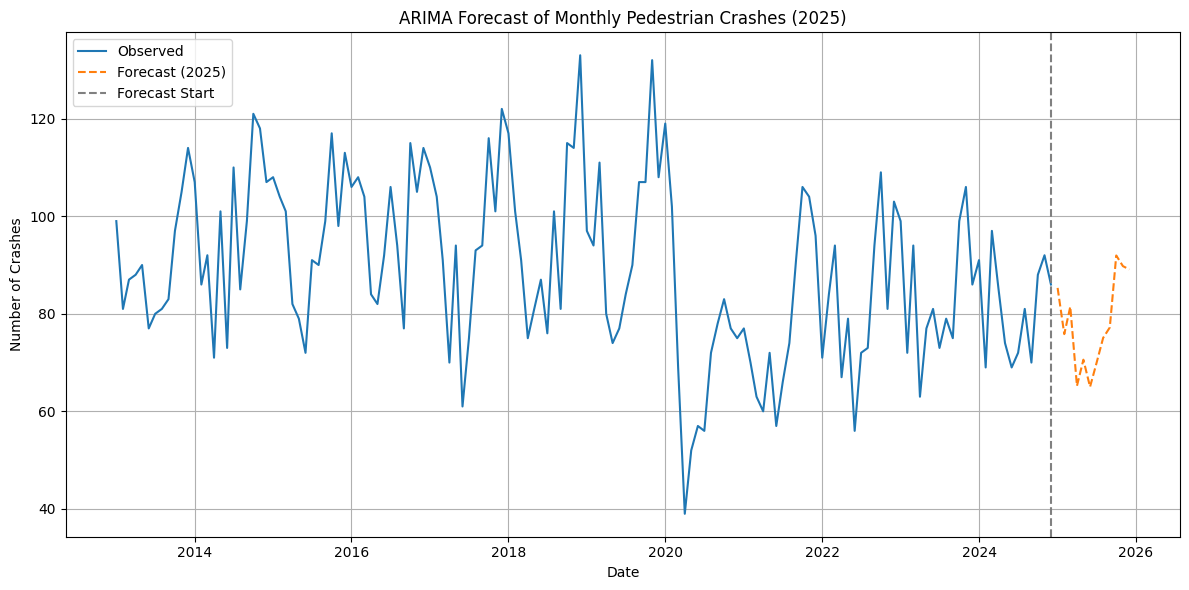


📅 Forecasted Crashes for 2025:
2025-01-01    85
2025-02-01    76
2025-03-01    81
2025-04-01    65
2025-05-01    71
2025-06-01    65
2025-07-01    70
2025-08-01    75
2025-09-01    77
2025-10-01    92
2025-11-01    90
2025-12-01    89
Freq: MS, dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pmdarima import auto_arima
from datetime import datetime

# Load the data
csv_path = "/content/drive/MyDrive/traffic data/social status merge/Ped_Crashes.csv"
df = pd.read_csv(csv_path)

# Convert collision date to datetime
df['COLLISION_DATE'] = pd.to_datetime(df['COLLISION_DATE'], errors='coerce')
df = df.dropna(subset=['COLLISION_DATE'])

# Create a monthly time index
df['year_month'] = df['COLLISION_DATE'].dt.to_period('M').dt.to_timestamp()

# Count crashes per month
monthly_counts = df.groupby('year_month').size().reset_index(name='total_crashes')
monthly_counts.set_index('year_month', inplace=True)
monthly_counts = monthly_counts.asfreq('MS')  # Ensure monthly frequency

# Fit ARIMA model
model = auto_arima(
    monthly_counts['total_crashes'],
    seasonal=True,
    m=12,  # Monthly seasonality
    stepwise=True,
    suppress_warnings=True,
    trace=True
)

# Print model summary and coefficients
print("\n=== ARIMA Model Summary ===")
print(model.summary())

print("\n=== Model Coefficients ===")
print(model.params())

# Forecast next 12 months (for 2025)
forecast = model.predict(n_periods=12)
forecast_index = pd.date_range(start=monthly_counts.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot actual + forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['total_crashes'], label='Observed')
plt.plot(forecast_series, label='Forecast (2025)', linestyle='--')
plt.axvline(monthly_counts.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.title("ARIMA Forecast of Monthly Pedestrian Crashes (2025)")
plt.xlabel("Date")
plt.ylabel("Number of Crashes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print forecasted values
print("\n📅 Forecasted Crashes for 2025:")
print(forecast_series.round(0).astype(int))




/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


📊 Crash Summary for 2023–2024:
 Year     Month  total_crashes
 2023   January             99
 2023  February             72
 2023     March             94
 2023     April             63
 2023       May             77
 2023      June             81
 2023      July             73
 2023    August             79
 2023 September             75
 2023   October             99
 2023  November            106
 2023  December             86
 2024   January             91
 2024  February             69
 2024     March             97
 2024     April             85
 2024       May             74
 2024      June             69
 2024      July             72
 2024    August             81
 2024 September             70
 2024   October             88
 2024  November             92
 2024  December             86

📈 Forecasted Monthly Crashes for 2025:
         Month  Forecasted_Crashes
  January 2025                  85
 February 2025                  76
    March 2025                  81
    April 202

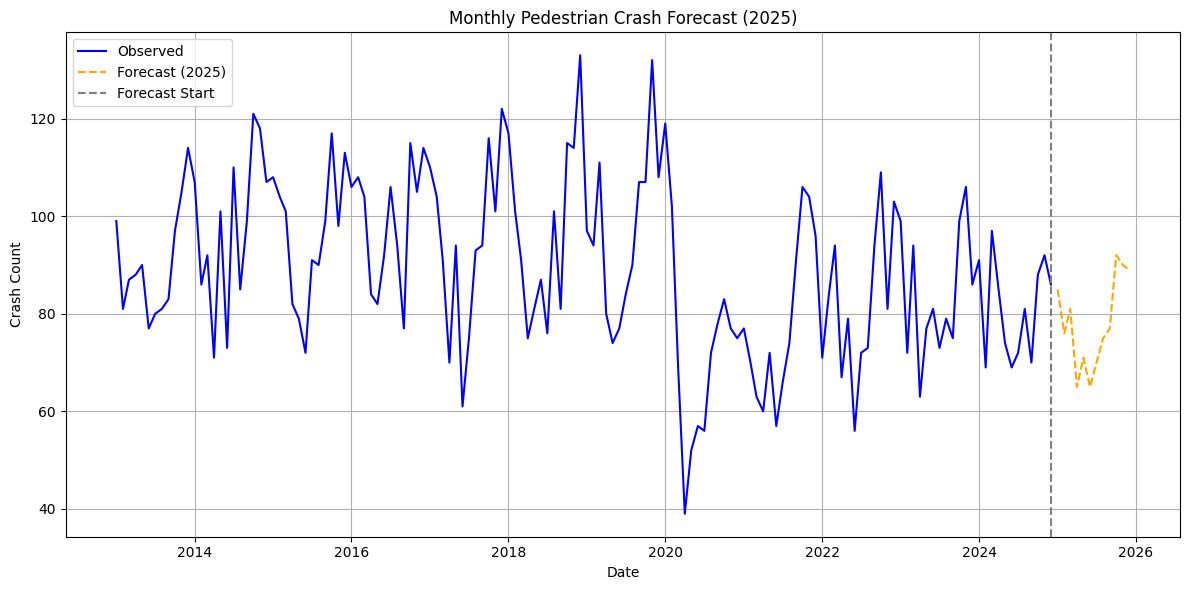

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from datetime import datetime

# Load crash data
csv_path = "/content/drive/MyDrive/traffic data/social status merge/Ped_Crashes.csv"
df = pd.read_csv(csv_path)

# Convert COLLISION_DATE to datetime
df['COLLISION_DATE'] = pd.to_datetime(df['COLLISION_DATE'], errors='coerce')
df = df.dropna(subset=['COLLISION_DATE'])

# Aggregate monthly
df['year_month'] = df['COLLISION_DATE'].dt.to_period('M').dt.to_timestamp()
monthly_counts = df.groupby('year_month').size().reset_index(name='total_crashes')
monthly_counts.set_index('year_month', inplace=True)
monthly_counts = monthly_counts.asfreq('MS')  # Monthly Start frequency

# === Step 1: Fit SARIMA Model ===
model = auto_arima(
    monthly_counts['total_crashes'],
    seasonal=True,
    m=12,
    trace=False,
    suppress_warnings=True
)

# === Step 2: Forecast for 2025 ===
forecast = model.predict(n_periods=12)
forecast_index = pd.date_range(
    start=monthly_counts.index[-1] + pd.DateOffset(months=1),
    periods=12,
    freq='MS'
)
forecast_series = pd.Series(forecast, index=forecast_index).round(0).astype(int)

# === Step 3: Print 2023–2024 summary ===
recent_years = monthly_counts['2023-01-01':'2024-12-01']
summary_recent = recent_years.copy()
summary_recent['Year'] = summary_recent.index.year
summary_recent['Month'] = summary_recent.index.strftime('%B')
summary_recent = summary_recent[['Year', 'Month', 'total_crashes']]

print("\n📊 Crash Summary for 2023–2024:")
print(summary_recent.to_string(index=False))

# === Step 4: Print 2025 Forecast ===
forecast_df = forecast_series.reset_index()
forecast_df.columns = ['Month', 'Forecasted_Crashes']
forecast_df['Month'] = forecast_df['Month'].dt.strftime('%B %Y')

print("\n📈 Forecasted Monthly Crashes for 2025:")
print(forecast_df.to_string(index=False))

# === Optional: Plot Actual + Forecast ===
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts, label='Observed', color='blue')
plt.plot(forecast_series, label='Forecast (2025)', linestyle='--', color='orange')
plt.axvline(monthly_counts.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.title("Monthly Pedestrian Crash Forecast (2025)")
plt.xlabel("Date")
plt.ylabel("Crash Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# Count how many years had increasing vs decreasing crashes
num_increase = (yearly_counts['percent_change'] > 0).sum()
num_decrease = (yearly_counts['percent_change'] < 0).sum()

print(f"\n📈 Number of years with increased crashes: {num_increase}")
print(f"📉 Number of years with decreased crashes: {num_decrease}")

# Determine general trend
if num_increase > num_decrease:
    print("🔺 Overall trend: Increasing number of pedestrian crashes.")
elif num_decrease > num_increase:
    print("🔻 Overall trend: Decreasing number of pedestrian crashes.")
else:
    print("➡️ Overall trend: No clear increase or decrease.")



📈 Number of years with increased crashes: 6
📉 Number of years with decreased crashes: 5
🔺 Overall trend: Increasing number of pedestrian crashes.


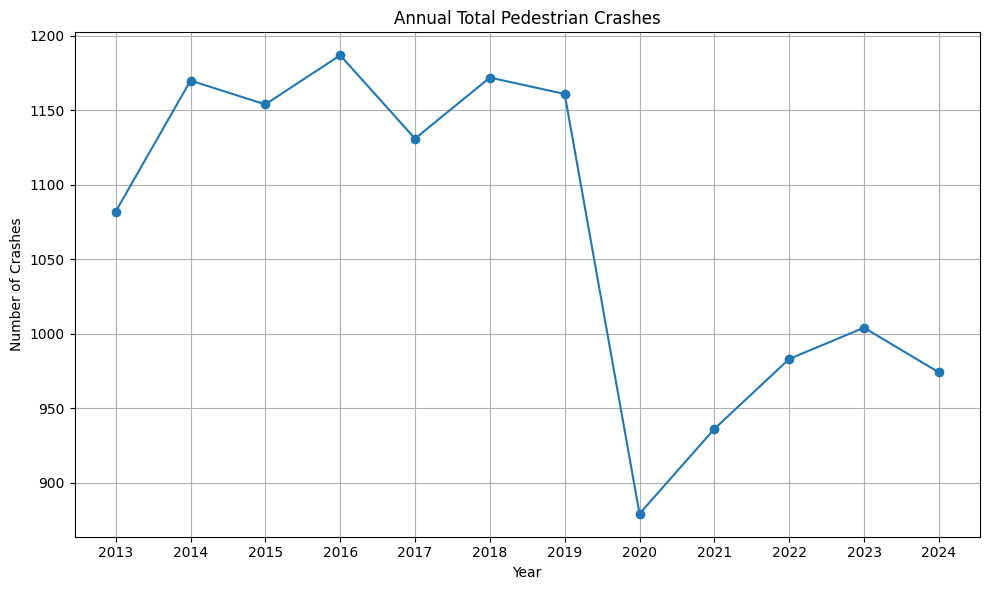

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
csv_path = "/content/drive/MyDrive/traffic data/social status merge/Ped_Crashes.csv"
df = pd.read_csv(csv_path)

# Convert 'COLLISION_DATE' to datetime
df['COLLISION_DATE'] = pd.to_datetime(df['COLLISION_DATE'], errors='coerce')

# Drop rows with invalid or missing dates
df = df.dropna(subset=['COLLISION_DATE'])

# Extract year
df['year'] = df['COLLISION_DATE'].dt.year

# Group by year and count crashes
yearly_counts = df.groupby('year').size().reset_index(name='total_crashes')

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts['year'], yearly_counts['total_crashes'], marker='o', linestyle='-')
plt.title("Annual Total Pedestrian Crashes")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.grid(True)
plt.xticks(yearly_counts['year'])
plt.tight_layout()
plt.show()


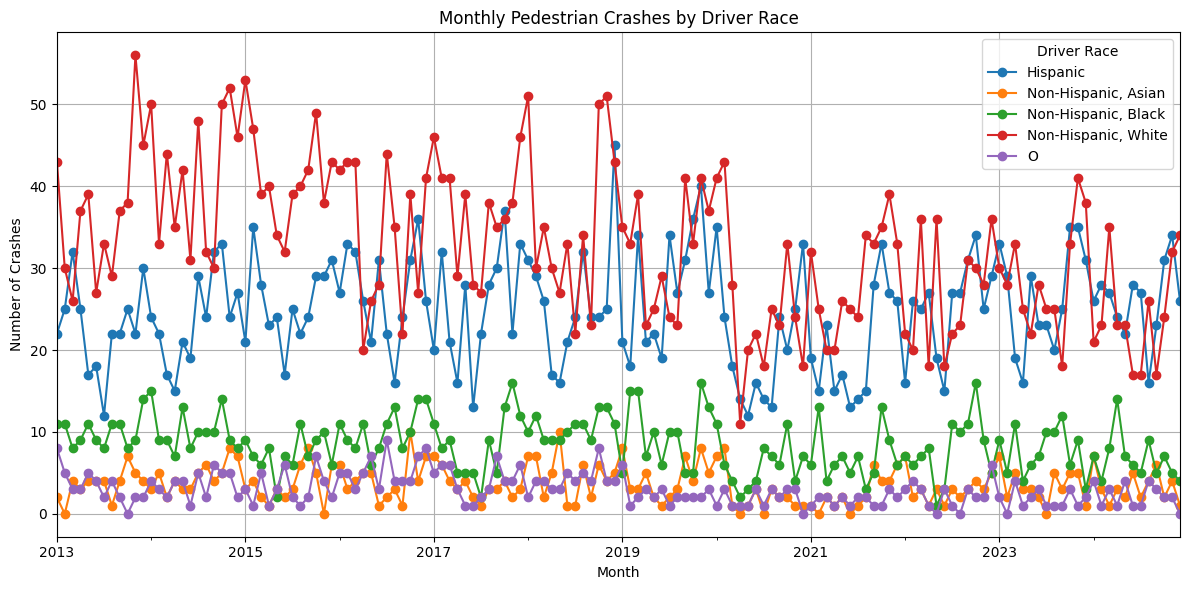

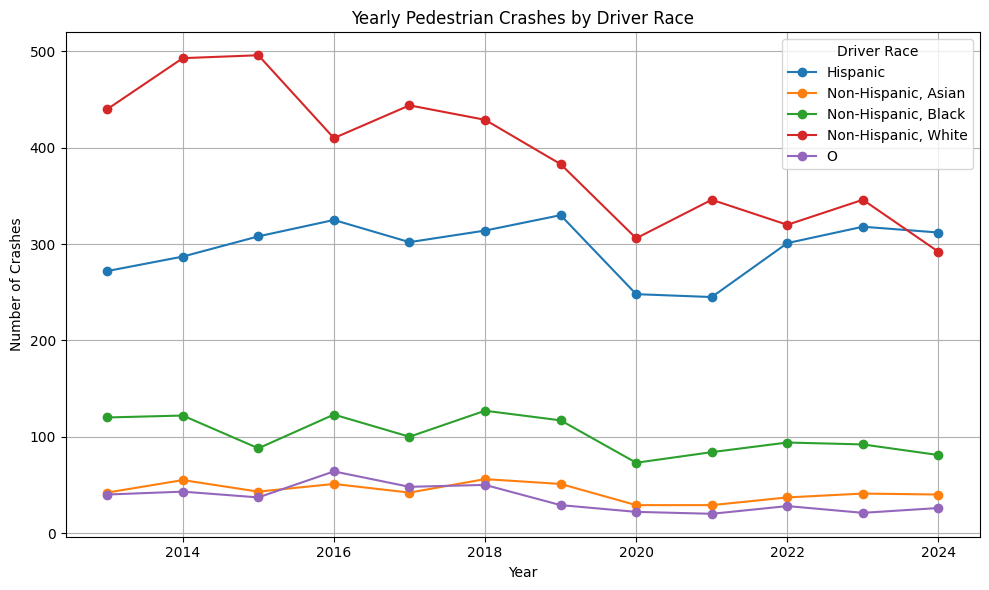

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
csv_path = "/content/drive/MyDrive/traffic data/social status merge/collisions_with_driver_race_population_with_time.csv"
df = pd.read_csv(csv_path)

# Convert COLLISION_DATE to datetime
df['COLLISION_DATE'] = pd.to_datetime(df['COLLISION_DATE'], errors='coerce')
df = df.dropna(subset=['COLLISION_DATE', 'RACE'])  # ensure RACE exists

# Create time columns
df['year_month'] = df['COLLISION_DATE'].dt.to_period('M').dt.to_timestamp()
df['year'] = df['COLLISION_DATE'].dt.year

# -------------------------
# 📊 Monthly totals by RACE
# -------------------------
monthly = df.groupby(['year_month', 'RACE']).size().reset_index(name='total_crashes')
monthly_pivot = monthly.pivot(index='year_month', columns='RACE', values='total_crashes').fillna(0)

# Plot monthly time series
monthly_pivot.plot(figsize=(12, 6), marker='o')
plt.title("Monthly Pedestrian Crashes by Driver Race")
plt.xlabel("Month")
plt.ylabel("Number of Crashes")
plt.grid(True)
plt.legend(title='Driver Race')
plt.tight_layout()
plt.show()

# -------------------------
# 📊 Yearly totals by RACE
# -------------------------
yearly = df.groupby(['year', 'RACE']).size().reset_index(name='total_crashes')
yearly_pivot = yearly.pivot(index='year', columns='RACE', values='total_crashes').fillna(0)

# Plot yearly time series
yearly_pivot.plot(figsize=(10, 6), marker='o')
plt.title("Yearly Pedestrian Crashes by Driver Race")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.grid(True)
plt.legend(title='Driver Race')
plt.tight_layout()
plt.show()


2. Check for Missing Data
This will help identify which columns have missing or null values that might need to be cleaned.

python
Copy
Edit


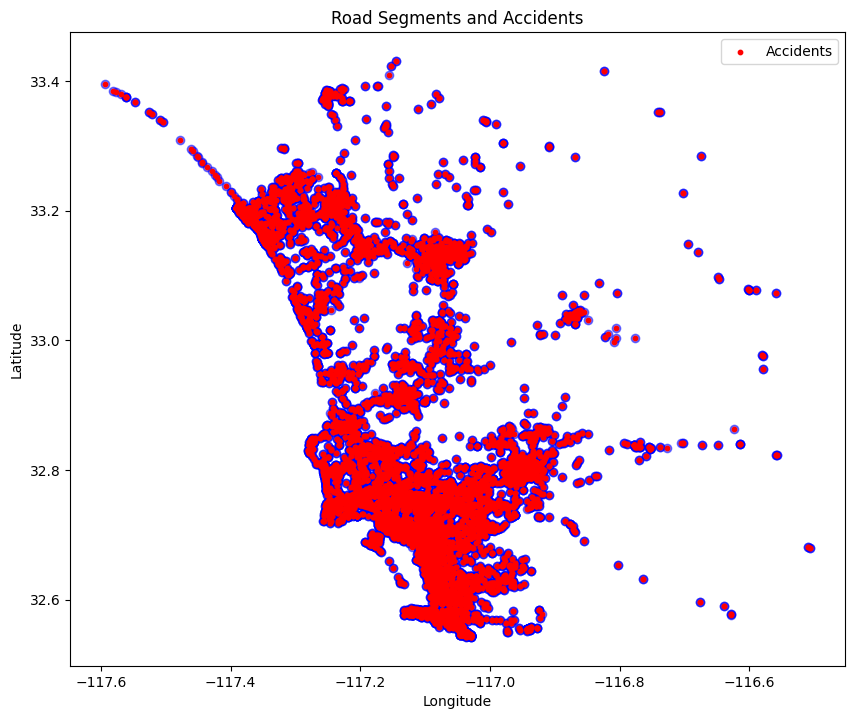

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Convert the cleaned data into a GeoDataFrame (if geometry exists)
gdf_cleaned = gpd.GeoDataFrame(cleaned_data, geometry='geometry')

# Plot the road segments
gdf_cleaned.plot(figsize=(10, 10), color='blue', alpha=0.5)

# If you have accident locations as points (using POINT_X, POINT_Y), you can plot them as well
plt.scatter(cleaned_data['POINT_X'], cleaned_data['POINT_Y'], color='red', s=10, label='Accidents')

plt.title('Road Segments and Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()



In [ ]:
import pandas as pd
import folium
from folium.plugins import TimestampedGeoJson
from shapely.geometry import Point
import json

# Load the data
csv_path = "/content/drive/MyDrive/traffic data/social status merge/Ped_Crashes.csv"
df = pd.read_csv(csv_path)

# Convert dates and drop missing locations
df['COLLISION_DATE'] = pd.to_datetime(df['COLLISION_DATE'], errors='coerce')
df = df.dropna(subset=['COLLISION_DATE', 'latitude', 'longitude'])

# Round timestamp to remove time portion
df['COLLISION_DATE'] = df['COLLISION_DATE'].dt.strftime('%Y-%m-%d')

# Build GeoJSON structure for time series
features = []
for _, row in df.iterrows():
    feature = {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [row['longitude'], row['latitude']],
        },
        'properties': {
            'time': row['COLLISION_DATE'],
            'style': {'color': 'red'},
            'icon': 'circle',
            'popup': f"Date: {row['COLLISION_DATE']}"
        }
    }
    features.append(feature)

geojson = {
    'type': 'FeatureCollection',
    'features': features
}

# Initialize Folium map centered on San Diego (adjust as needed)
m = folium.Map(location=[32.7157, -117.1611], zoom_start=11)

# Add time slider layer
TimestampedGeoJson(
    data=geojson,
    transition_time=300,
    period='P1D',
    add_last_point=True,
    auto_play=True,
    loop=False,
    max_speed=1,
    loop_button=True,
    date_options='YYYY-MM-DD',
    time_slider_drag_update=True
).add_to(m)

# Show the map
m


KeyboardInterrupt: 

In [ ]:
# Get general information about the data
collisions.info()

# Summary statistics for numerical columns
collisions.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11955 entries, 0 to 11954
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CASE_ID                  11955 non-null  int64  
 1   ACCIDENT_YEAR            11955 non-null  int64  
 2   PROC_DATE                11955 non-null  object 
 3   JURIS                    11955 non-null  int64  
 4   COLLISION_DATE           11955 non-null  object 
 5   COLLISION_TIME           11955 non-null  int64  
 6   OFFICER_ID               11950 non-null  object 
 7   REPORTING_DISTRICT       1556 non-null   object 
 8   DAY_OF_WEEK              11955 non-null  int64  
 9   CHP_SHIFT                11955 non-null  int64  
 10  POPULATION               11955 non-null  int64  
 11  CNTY_CITY_LOC            11955 non-null  int64  
 12  SPECIAL_COND             11955 non-null  int64  
 13  BEAT_TYPE                11955 non-null  int64  
 14  CHP_BEAT_TYPE         

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_TIME,DAY_OF_WEEK,CHP_SHIFT,POPULATION,CNTY_CITY_LOC,SPECIAL_COND,BEAT_TYPE,...,COUNT_PED_KILLED,COUNT_PED_INJURED,COUNT_BICYCLIST_KILLED,COUNT_BICYCLIST_INJURED,COUNT_MC_KILLED,COUNT_MC_INJURED,LATITUDE,LONGITUDE,POINT_X,POINT_Y
count,1.195500e+04,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,...,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,2247.000000,2247.000000,11955.000000,11955.000000
mean,1.896039e+07,2018.094856,4540.838059,1431.919364,3.921205,4.589377,6.522627,3710.133919,0.000502,0.252112,...,0.077039,0.963363,0.000084,0.006190,0.000335,0.005186,32.944387,-117.086156,-117.125789,32.834525
std,2.772477e+07,3.343284,2064.983728,598.351836,1.906852,1.054133,1.173384,11.607557,0.022398,0.710596,...,0.273784,0.370390,0.009146,0.082591,0.018289,0.072986,0.271155,0.188499,0.131819,0.210639
min,5.639604e+06,2013.000000,3700.000000,0.000000,1.000000,1.000000,2.000000,3700.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.501950,-121.495399,-122.465218,32.542342
25%,7.086749e+06,2015.000000,3706.000000,946.000000,2.000000,5.000000,6.000000,3706.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32.740825,-117.173103,-117.191685,32.711784
50%,8.749070e+06,2018.000000,3711.000000,1548.000000,4.000000,5.000000,7.000000,3711.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32.857930,-117.082990,-117.118652,32.758427
75%,9.508346e+06,2021.000000,3711.000000,1916.000000,5.000000,5.000000,7.000000,3711.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.133900,-117.001881,-117.067127,32.910622
max,9.449241e+07,2024.000000,9680.000000,2500.000000,7.000000,5.000000,9.000000,3783.000000,1.000000,4.000000,...,4.000000,7.000000,1.000000,3.000000,1.000000,2.000000,38.582401,-116.110786,-116.110321,40.619320


Unique values in COLLISION_SEVERITY: [1 4 3 2]


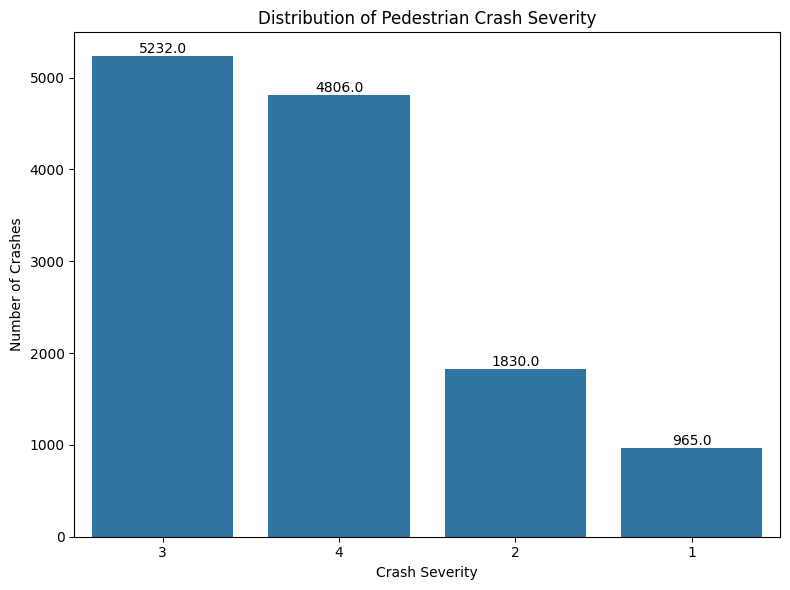


📊 Crash Counts by Severity:
COLLISION_SEVERITY
3    5232
4    4806
2    1830
1     965


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
csv_path = "/content/drive/MyDrive/traffic data/Ped_Crashes.csv"
crashes = pd.read_csv(csv_path)

# Check available severity levels
print("Unique values in COLLISION_SEVERITY:", crashes['COLLISION_SEVERITY'].unique())

# Plot crash severity distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=crashes, x='COLLISION_SEVERITY', order=crashes['COLLISION_SEVERITY'].value_counts().index)
plt.title('Distribution of Pedestrian Crash Severity')
plt.xlabel('Crash Severity')
plt.ylabel('Number of Crashes')

# Add count labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Count and print total by severity
severity_counts = crashes['COLLISION_SEVERITY'].value_counts()
print("\n📊 Crash Counts by Severity:")
print(severity_counts.to_string())


📸 Displaying images with matching IDs...

🖼️ 8351086;8067105;6589925;8789600;9038383;9194751;9196031;9381319;9391812;9538304;6883958_32.58374253224121_-117.09263405633465.png


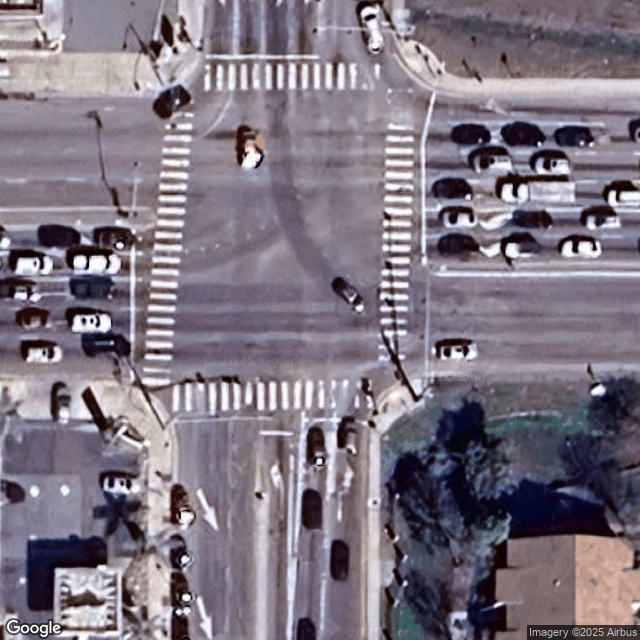

🖼️ 9359233;9591359;9633320;8714149;6428246;6449091;6580609;7127816;8077193;8146671;8480924;8412596;9421384_32.69542206879297_-117.0293455526992.png


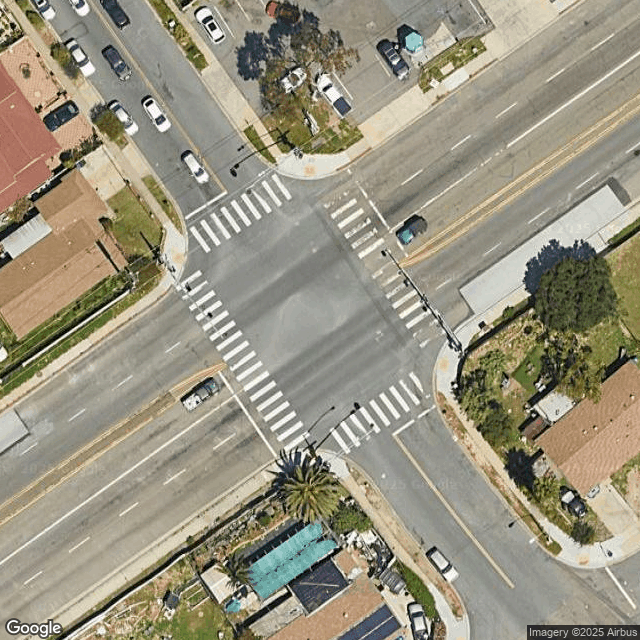

🖼️ 6353381;6877510;8304003;8688380;8788576;8793655;9383440;9416185;9458623;9477886;9662575;9719783;9760997;9762121;6705280_32.554062156549485_-116.9424268496224.png


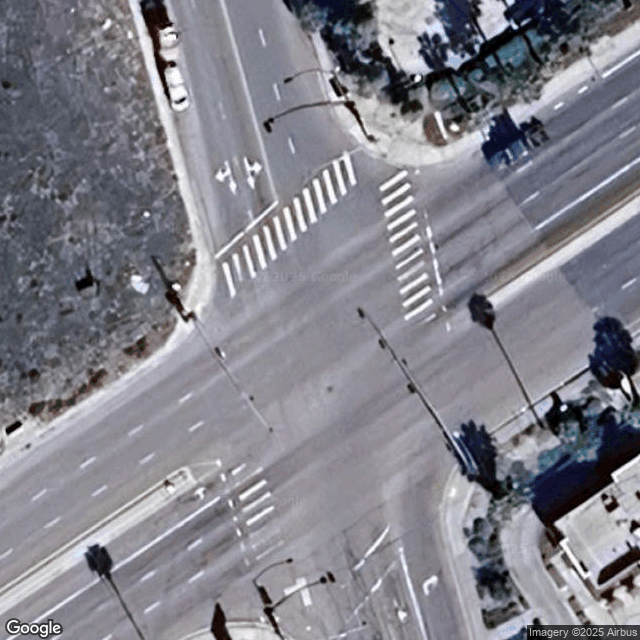

In [9]:
import os
from IPython.display import Image, display

# Directory path
image_dir = "/content/drive/MyDrive/traffic data/image2andmore"

# Target substrings
target_ids = ["8351086", "9359233", "8304003"]

# Get list of matching image filenames
all_files = os.listdir(image_dir)
matching_files = [f for f in all_files if any(tid in f for tid in target_ids)]

# Display matching images
print("📸 Displaying images with matching IDs...\n")
for file in matching_files:
    image_path = os.path.join(image_dir, file)
    print(f"🖼️ {file}")
    display(Image(filename=image_path))




In [11]:
import pandas as pd

# Load your dataset (replace with the correct path if needed)
df = pd.read_csv("/content/drive/MyDrive/traffic data/Ped_Crashes.csv")  # or another file

# Filter for the specific CASE_ID
case_id = 8351086
row = df[df['CASE_ID'] == case_id]

# Print the result
if not row.empty:
    print(f"📄 Row(s) with CASE_ID {case_id}:")
    print(row.to_string(index=False))
else:
    print(f"⚠️ No row found with CASE_ID {case_id}")


📄 Row(s) with CASE_ID 8351086:
 CASE_ID  ACCIDENT_YEAR  PROC_DATE  JURIS COLLISION_DATE  COLLISION_TIME OFFICER_ID REPORTING_DISTRICT  DAY_OF_WEEK  CHP_SHIFT  POPULATION  CNTY_CITY_LOC  SPECIAL_COND  BEAT_TYPE CHP_BEAT_TYPE  CITY_DIVISION_LAPD  CHP_BEAT_CLASS BEAT_NUMBER PRIMARY_RD SECONDARY_RD  DISTANCE DIRECTION INTERSECTION WEATHER_1 WEATHER_2 STATE_HWY_IND CALTRANS_COUNTY  CALTRANS_DISTRICT  STATE_ROUTE ROUTE_SUFFIX POSTMILE_PREFIX  POSTMILE LOCATION_TYPE RAMP_INTERSECTION SIDE_OF_HWY TOW_AWAY  COLLISION_SEVERITY  NUMBER_KILLED  NUMBER_INJURED  PARTY_COUNT PRIMARY_COLL_FACTOR PCF_CODE_OF_VIOL PCF_VIOL_CATEGORY  PCF_VIOLATION PCF_VIOL_SUBSECTION HIT_AND_RUN TYPE_OF_COLLISION MVIW PED_ACTION ROAD_SURFACE ROAD_COND_1 ROAD_COND_2 LIGHTING CONTROL_DEVICE  CHP_ROAD_TYPE PEDESTRIAN_ACCIDENT BICYCLE_ACCIDENT MOTORCYCLE_ACCIDENT TRUCK_ACCIDENT NOT_PRIVATE_PROPERTY ALCOHOL_INVOLVED STWD_VEHTYPE_AT_FAULT CHP_VEHTYPE_AT_FAULT  COUNT_SEVERE_INJ  COUNT_VISIBLE_INJ  COUNT_COMPLAINT_PAIN  COUNT_PE

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=collisions, x='COLLISION_SEVERITY', order=collisions['COLLISION_SEVERITY'].value_counts().index)
plt.title('Distribution of Crash Severity')
plt.xlabel('Crash Severity')
plt.ylabel('Number of Crashes')

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Count and print total by severity
severity_counts = collisions['COLLISION_SEVERITY'].value_counts()
print("📊 Crash Counts by Severity:\n")
print(severity_counts.to_string())


NameError: name 'collisions' is not defined

<Figure size 800x600 with 0 Axes>

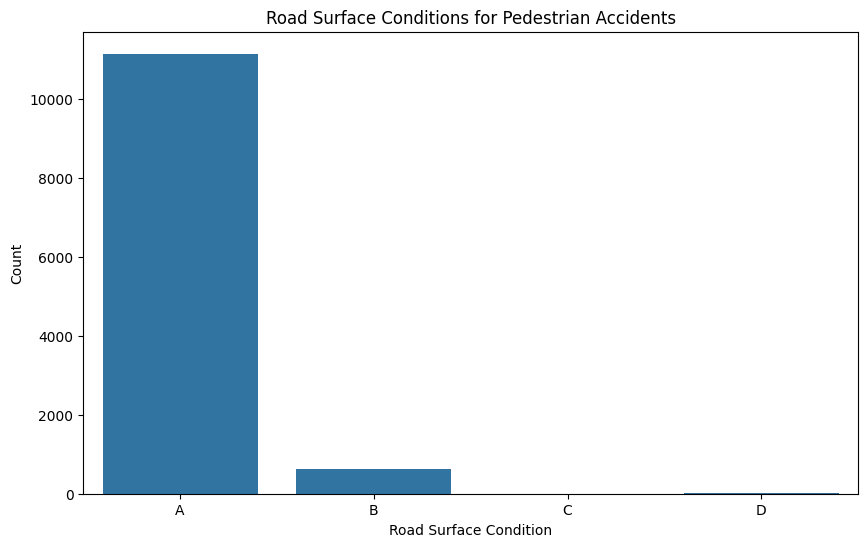

In [ ]:


# Plotting road surface conditions for pedestrian-involved accidents
pedestrian_accidents = collisions[collisions['PEDESTRIAN_ACCIDENT'] == 'Y']
plt.figure(figsize=(10,6))
sns.countplot(data=pedestrian_accidents, x='ROAD_SURFACE', order=['A', 'B', 'C', 'D'])
plt.title('Road Surface Conditions for Pedestrian Accidents')
plt.xlabel('Road Surface Condition')
plt.ylabel('Count')
plt.show()


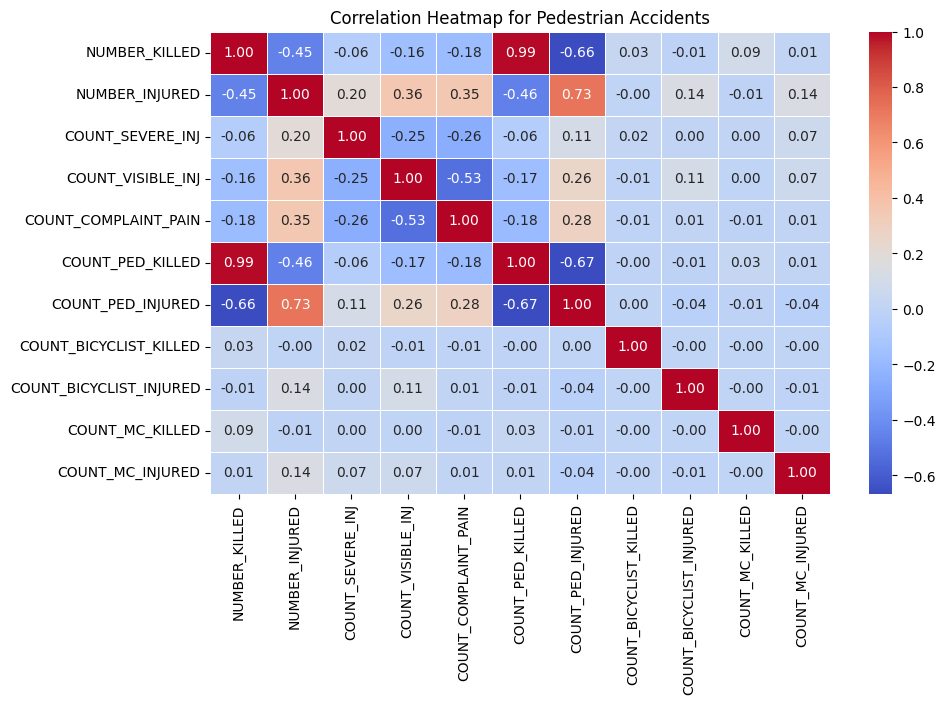

In [ ]:
pedestrian_accidents = collisions[collisions['PEDESTRIAN_ACCIDENT'] == 'Y']

# Select numeric columns for correlation analysis
numerical_cols = pedestrian_accidents[['NUMBER_KILLED', 'NUMBER_INJURED', 'COUNT_SEVERE_INJ',
                                       'COUNT_VISIBLE_INJ', 'COUNT_COMPLAINT_PAIN', 'COUNT_PED_KILLED',
                                       'COUNT_PED_INJURED', 'COUNT_BICYCLIST_KILLED', 'COUNT_BICYCLIST_INJURED',
                                       'COUNT_MC_KILLED', 'COUNT_MC_INJURED']]

# Compute the correlation matrix
correlation_matrix = numerical_cols.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Pedestrian Accidents')
plt.show()